In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import glob
import random
import shutil
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from sklearn import metrics

In [19]:
#Função para mostrar uma imagem
def showSingleImage(img, title, size):
    fig, axis = plt.subplots(figsize=size)
    axis.imshow(img, cmap='gray')
    axis.set_title(title)
    plt.show()

In [20]:
#Vendo algumas imagens de cachorros
current_path = os.path.abspath(os.getcwd())
path_imgs = current_path+"\\animals\\"
dogs_imgs_path = path_imgs+"dogs\\"
cats_imgs_path = path_imgs+"cats\\"
print(dogs_imgs_path)
dogs_img = glob.glob(dogs_imgs_path+"dogs_*")
print("Total de imagens de cachorros: ", len(dogs_img))
random_dogs = [cv2.imread(img) for img in random.sample(dogs_img, 5)]
random_dogs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in random_dogs]
titles = ["dog_"+str(i) for i in range(5)]
for i in range(5):
   showSingleImage(random_dogs[i], titles[i], (2, 2))

c:\projetos\IEEE_CIS\periodo4\animals\dogs\
Total de imagens de cachorros:  0


ValueError: Sample larger than population or is negative

In [ ]:
#Criando uma nova pasta para atender a estrutuda nessessária

folder = "\\imgs_ds"
train_folder = current_path + folder + "\\train"
test_folder = current_path + folder + "\\test"
validation_folder = current_path + folder + "\\validation"

os.mkdir(current_path + folder)
os.mkdir(train_folder)
os.mkdir(test_folder)
os.mkdir(validation_folder)

new_folder_train_dogs = train_folder + "\\dogs"
new_folder_train_cats = train_folder + "\\cats"
new_folder_train_panda = train_folder + "\\panda"
new_folder_test_dogs = test_folder + "\\dogs"
new_folder_test_cats = test_folder + "\\cats"
new_folder_test_panda = test_folder + "\\panda"
new_folder_validation_dogs = validation_folder + "\\dogs"
new_folder_validation_cats = validation_folder + "\\cats"
new_folder_validation_panda = validation_folder + "\\panda"

os.mkdir(new_folder_train_dogs)
os.mkdir(new_folder_train_cats)
os.mkdir(new_folder_train_panda)
os.mkdir(new_folder_test_dogs)
os.mkdir(new_folder_test_cats)
os.mkdir(new_folder_test_panda)
os.mkdir(new_folder_validation_dogs)
os.mkdir(new_folder_validation_cats)
os.mkdir(new_folder_validation_panda)



FileExistsError: [WinError 183] Não é possível criar um arquivo já existente: 'c:\\projetos\\IEEE_CIS\\periodo4\\imgs_ds'

In [ ]:
import shutil

percent_val = 0.10
percent_test = 0.20
cats_imgs_path = path_imgs+"cats\\"
panda_imgs_path = path_imgs+"panda\\"
dogs_img = glob.glob(dogs_imgs_path+"dogs_*")
cats_img = glob.glob(cats_imgs_path+"cats_*")
panda_img = glob.glob(panda_imgs_path+"panda_*")
print(len(cats_img))
print(len(dogs_img))
print(len(panda_img))
def moveImagesToCorrectFolder():
    i = 0
    #para cada imagem de cachorro, mover para a pasta correta
    for f in dogs_img:
        filename = f.split("\\")[-1]
        if i <= percent_val*1000: #10% das imagens vão para val
            shutil.move(f, new_folder_validation_dogs + "\\" + filename) #move de origem para val de cachorro
        elif i > percent_test*1000 and i <= (percent_val + percent_test)*1000:
            shutil.move(f, new_folder_test_dogs + "\\" + filename) #move de origem para teste de cachorro
        else:
            shutil.move(f, new_folder_train_dogs + "\\" + filename)
        i = i + 1 
    i = 0
    #para cada imagem de gato, mover para a pasta correta
    for f in cats_img:
        filename = f.split("\\")[-1] 
        #print(i)
        if i < percent_val*1000:
            shutil.move(f, new_folder_validation_cats + "\\" + filename) #move de origem para val de gato
        elif i > percent_test*1000 and i <= (percent_val + percent_test) * 1000:
            shutil.move(f, new_folder_test_cats + "\\" + filename) #move de origem para teste de gato
        else:
            shutil.move(f, new_folder_train_cats + "\\" + filename) #move de origem para treino de gato
        i = i + 1
    i = 0
    #para cada imagem de panda, mover para a pasta correta
    for f in panda_img:
        filename = f.split("\\")[-1] 
        #print(i)
        if i < percent_val*1000:
            #print("Entrou1") #10% das imagens vão para val
            shutil.move(f, new_folder_validation_panda + "\\" + filename) 
        elif i > percent_test*1000 and i <= (percent_val + percent_test) * 1000:
            #print("Entrou2") 
            shutil.move(f, new_folder_test_panda + "\\" + filename) 
        else:
            #print("Entrou3")
            shutil.move(f, new_folder_train_panda + "\\" + filename)
        i = i + 1
        
moveImagesToCorrectFolder()

0
0
0


In [21]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
print(train_folder)
train_generator = datagen.flow_from_directory(
    train_folder,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    validation_folder,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_folder,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical'
)

print(train_generator.class_indices)
print(train_generator.image_shape)

c:\projetos\IEEE_CIS\periodo4\imgs_ds\train
Found 2398 images belonging to 3 classes.
Found 302 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
{'cats': 0, 'dogs': 1, 'panda': 2}
(160, 160, 3)


In [22]:
#Criando modelo
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

result = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator
)

pred = model.predict(test_generator)

Epoch 1/3
75/75 [==============================] - 116s 1s/step - loss: 1.1626 - accuracy: 0.5117 - val_loss: 0.8511 - val_accuracy: 0.6026
Epoch 2/3
75/75 [==============================] - 115s 2s/step - loss: 0.8260 - accuracy: 0.5634 - val_loss: 0.7897 - val_accuracy: 0.5861
Epoch 3/3
10/10 [==============================] - 8s 623ms/step


In [23]:
def plot_model(result):
    acc = result.history['accuracy']
    val_acc = result.history['val_accuracy']
    loss = result.history['loss']
    val_loss = result.history['val_loss']
    epochs = range(len(acc))
    plt.gcf().clear()
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.legend(loc = 'lower right')
    plt.subplot(1, 2, 2)
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.legend(loc = 'lower right')
    plt.show()

    

<Figure size 640x480 with 0 Axes>

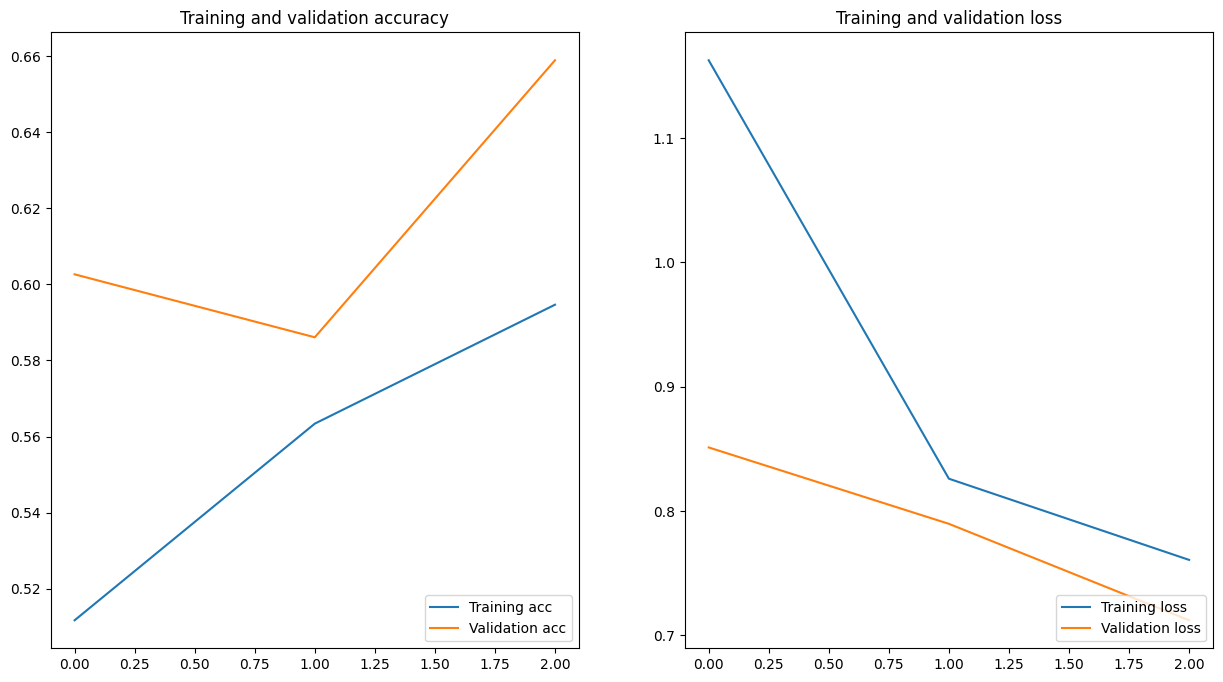

10/10 [==============================] - 6s 578ms/step - loss: 0.7336 - accuracy: 0.6067
Loss:  0.7336327433586121
Acc:  0.6066666841506958


In [24]:
plot_model(result)
#É possivel observar um overfitting
#print(test_generator.labels)
loss, acc = model.evaluate(test_generator)
print("Loss: ", loss)
print("Acc: ", acc)

In [25]:
#Aplicando data agumentation e transfer learning
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
])

transfer_learning = tf.keras.applications.MobileNetV2(
    input_shape=train_generator.image_shape,
    include_top=False,
    weights="imagenet",
)

transfer_learning.trainable = False
transfer_learning.summary()


Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

Epoch 1/3
75/75 [==============================] - 94s 1s/step - loss: 0.5652 - accuracy: 0.7531 - val_loss: 0.2266 - val_accuracy: 0.9040
Epoch 2/3
75/75 [==============================] - 73s 974ms/step - loss: 0.3381 - accuracy: 0.8536 - val_loss: 0.1717 - val_accuracy: 0.9437
Epoch 3/3
75/75 [==============================] - 75s 992ms/step - loss: 0.3006 - accuracy: 0.8686 - val_loss: 0.1630 - val_accuracy: 0.9503


<Figure size 640x480 with 0 Axes>

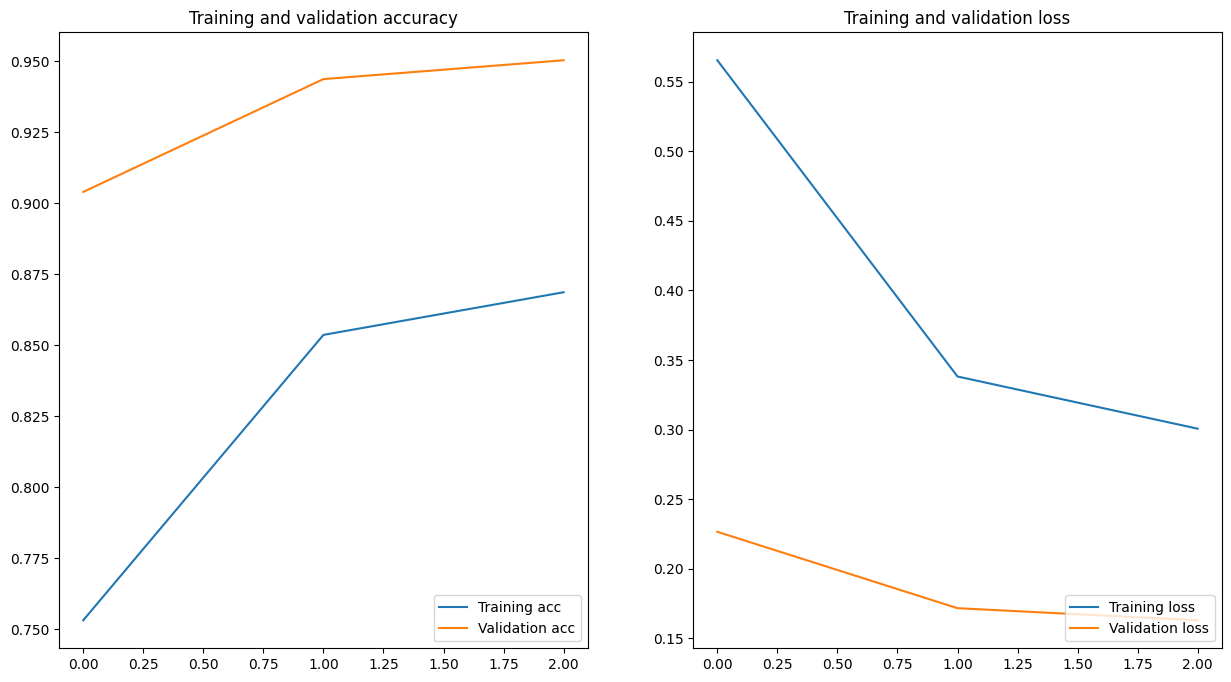

In [26]:
#Modificando o antigo modelo
model = models.Sequential([
    data_augmentation,
    transfer_learning,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

result2 = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator
)

plot_model(result2)

#É possivel observar que o modelo melhorou, Havendo uma maior acurácia e menor tempo de treinamento

In [27]:
loss, acc = model.evaluate(test_generator)
print("Loss: ", loss)
print("Acc: ", acc)

10/10 [==============================] - 8s 782ms/step - loss: 0.1137 - accuracy: 0.9600
Loss:  0.11368674039840698
Acc:  0.9599999785423279


10/10 [==============================] - 11s 839ms/step


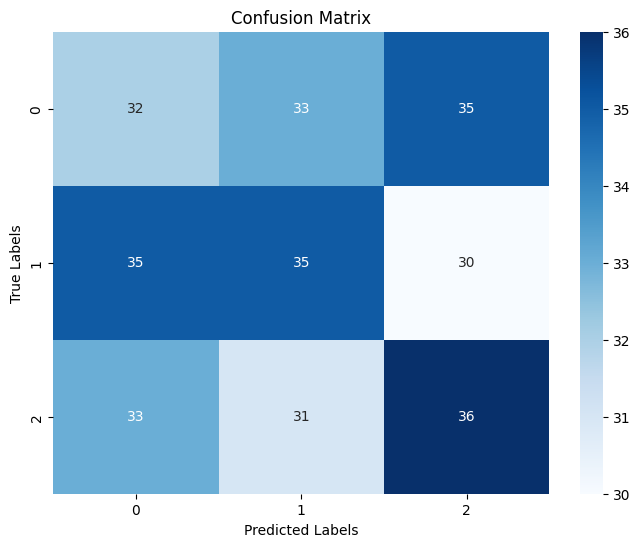

              precision    recall  f1-score   support

        cats       0.32      0.32      0.32       100
        dogs       0.35      0.35      0.35       100
       panda       0.36      0.36      0.36       100

    accuracy                           0.34       300
   macro avg       0.34      0.34      0.34       300
weighted avg       0.34      0.34      0.34       300



In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred = np.argmax(model.predict(test_generator), axis=-1)
y_true = test_generator.classes

# Calcular a matriz de confusão
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Imprimir um relatório de classificação
class_names = ['cats', 'dogs', 'panda'] 
print(classification_report(y_true, y_pred, target_names=class_names))

